In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Salary

## 1.1 
Предположим, что размер оклада зависит от опыта работы по формуле $\large salary_{c.u.} = (experience_{years} + 25) * 1000 $  
*(c.u. == conventional units == у.е.)

Постройте график зависимости размера зарплаты от опыта работы (опыт взять от 0 до 20 лет).
- Создайте вектор с размером опыта (сделайте шаг меньше, чем 1 год)  
- Создайте вектор с размером зарплаты  
- Постройте график  
- Добавьте адекватные подписи к осям и название графика

In [5]:
experience = np.arange(0, 20, 0.25)
salary = (experience + 25) * 1000

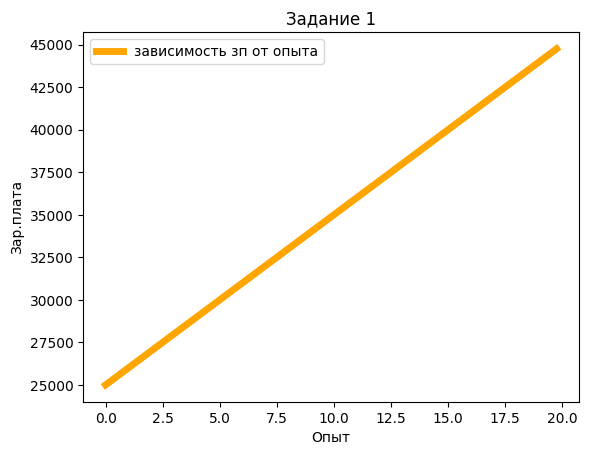

In [12]:
plt.plot(experience, salary, color='orange', linewidth=5, label='зависимость зп от опыта')
plt.xlabel('Опыт')
plt.ylabel('Зар.плата')
plt.title('Задание 1')
plt.legend()
plt.show()

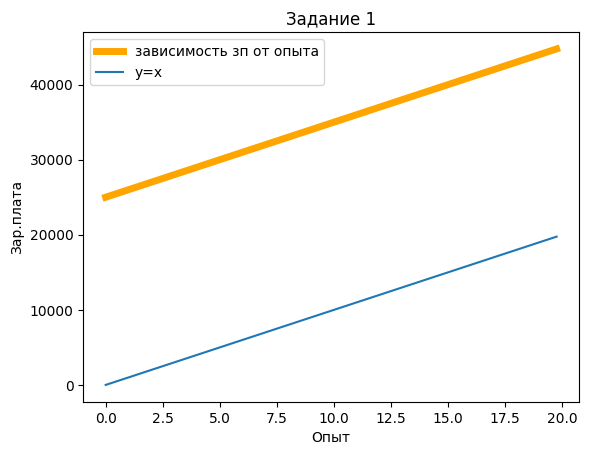

In [14]:
plt.plot(experience, salary, color='orange', linewidth=5, label='зависимость зп от опыта')
plt.plot(experience, experience * 1000, label='y=x')
plt.xlabel('Опыт')
plt.ylabel('Зар.плата')
plt.title('Задание 1')
plt.legend()
plt.show()

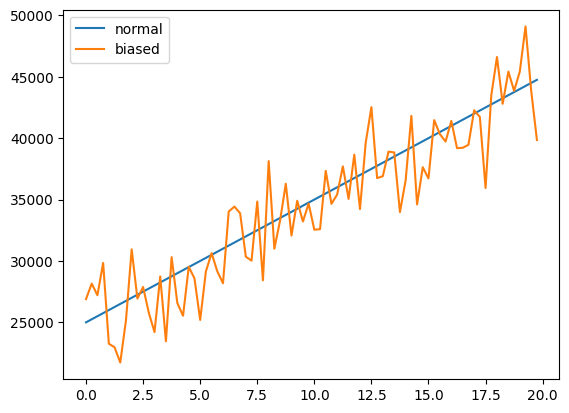

In [16]:
experience = np.arange(0, 20, 0.25)
salary = (experience + 25) * 1000
salary2 = (experience + 25) * 1000 + np.random.randn(experience.size) * 2500 * np.random.choice([-1, 1], size=experience.size)

plt.plot(experience, salary, label='normal')
plt.plot(experience, salary2, label='biased')

plt.legend()

plt.show()

## 1.2 
Для полученных векторов посчитайте коэффициент корреляции Пирсона (воспользуйтесь `pearsonr` из `scipy.stats`)

In [17]:
from scipy.stats import pearsonr
pearsonr(experience, salary)

PearsonRResult(statistic=1.0, pvalue=0.0)

In [18]:
pearsonr(experience, salary2)

PearsonRResult(statistic=0.912251786435527, pvalue=5.752400808133614e-32)

## 1.3 
На полученный в пункте 1.1 график добавьте значение коэффициенты корреляции куда-то в свободное место (т.е. просто повторите график и добавьте в него коэф. с помощью `plt.text` или plt.annotate)

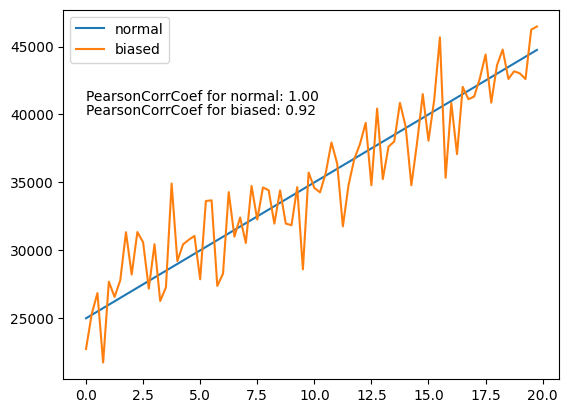

In [25]:
experience = np.arange(0, 20, 0.25)
salary = (experience + 25) * 1000
salary2 = (experience + 25) * 1000 + np.random.randn(experience.size) * 2500 * np.random.choice([-1, 1], size=experience.size)

plt.plot(experience, salary, label='normal')
plt.plot(experience, salary2, label='biased')

plt.text(0, 41000, f"PearsonCorrCoef for normal: {pearsonr(experience, salary).statistic:.2f}")
plt.text(0, 40000, f"PearsonCorrCoef for biased: {pearsonr(experience, salary2).statistic:.2f}")

plt.legend()

plt.show()

# 2. A/B test
На соревнования в деревню "Спортивная" приехали спортсмены из деревень "Пирсоново" и "Спирманово". Даны две выборки: рост приехавших спортсменов из каждой деревни. 

## 2.1
Дан файл `task2_data.csv` с информацией о росте спорстменов из каждой деревни. Прочитайе файл и создайте два вектора: рост спортсменов из одной деревни и из другой.

In [28]:
with open('task2_data.csv', 'r', encoding='utf8') as inpfile:
    inpfile.readline()
    p = np.zeros(50)
    s = np.zeros(50)
    
    for i, line in enumerate(inpfile):
        a, b = line.split(';')
        a, b = float(a), float(b)
        p[i] = a
        s[i] = b

## 2.2
Постройте гистограмму роста спортсменов каждой деревни на двух разных картинках (`plt.hist`)

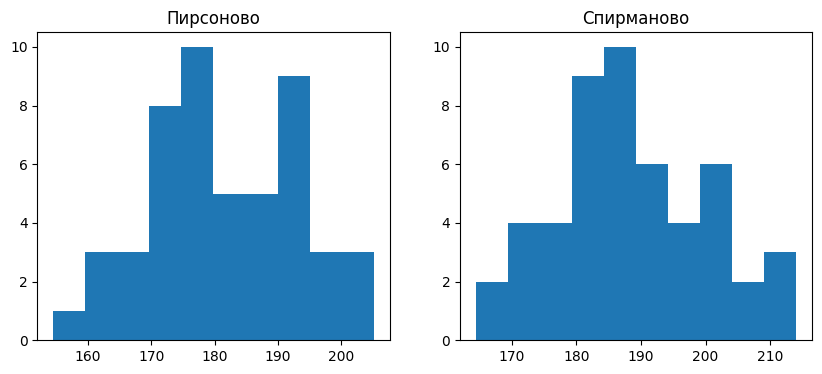

In [33]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Пирсоново')
plt.hist(p)

plt.subplot(1, 2, 2)
plt.title('Спирманово')
plt.hist(s)

plt.show()

## 2.3
Постройте гистограмму роста спорстменов из двух деревень на одной картинке (две гистограммы на одном холсте)

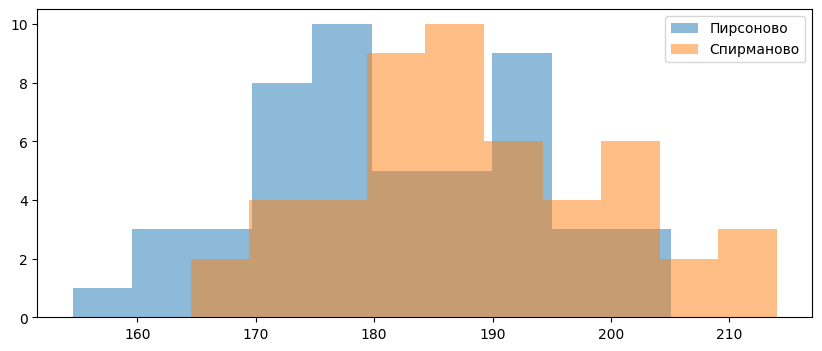

In [35]:
plt.figure(figsize=(10, 4))



plt.hist(p, label='Пирсоново', alpha=0.5)
plt.hist(s, label='Спирманово', alpha=0.5)

plt.legend()

plt.show()

## 2.4
Было выдвинуто предположение о том, что средний рост людей в двух деревнях отличается. Давайте попробуем по имеющейся у нас выборке оценить, правда ли это.  

Определите разницу средних двух выборок. 

* Можно ли по этой разнице что-то утверждать?  
* Какие проблемы могут быть, которые делают нашу оценку несостоятельной?

In [36]:
s.mean() - p.mean()

7.0310882824144585

## 2.5 (делайте пункты отдельно)
Представим, что имеющиеся у нас выборки более менее отраают реальную ситуацию в деревнях.  
Давайте проделаем следующую симуляцию (1000 раз сделайте одно и то же):
* Из каждой выборке (то есть из набора спортсменов каждой деревни) получите выборку того же размера с помощью отбора с повторением (т.е. из вектора ИКС нужно с помощью отбора с повторением получить новый вектор такой же размерности). Сделать это можно с помощью `np.random.choice`
* У нас есть два новых вектора (один получили из выборки одной деревни, другой -- из другой). Найдите разницу средних для этих векторов и сохраните эту разницу в какой-нибудь массив.
* Если повторить операции выше 1000 раз, то мы имеем 1000 разностей средних ростов, то есть уже не 1 оценку, а некоторое распределение. Для этого распределения постройте гистограмму.
* А теперь на этой гистограмме отметьте исходную разницу между средними с помощью `plt.axvline`
* Куда попала наша исходная точечная оценка? Что это может значить?

In [43]:
diffs = np.zeros(1000)

for i in range(1000):
    
    s_bootstrapped = np.random.choice(s, size=50)
    p_bootstrapped = np.random.choice(p, size=50)

    diff = s_bootstrapped.mean() - p_bootstrapped.mean()
    
    diffs[i] = diff

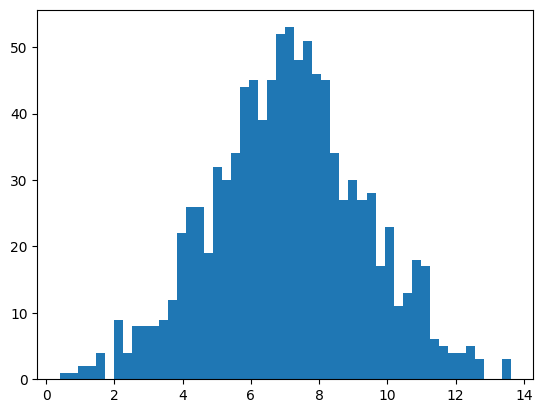

In [44]:
plt.hist(diffs, bins=50)
plt.show()

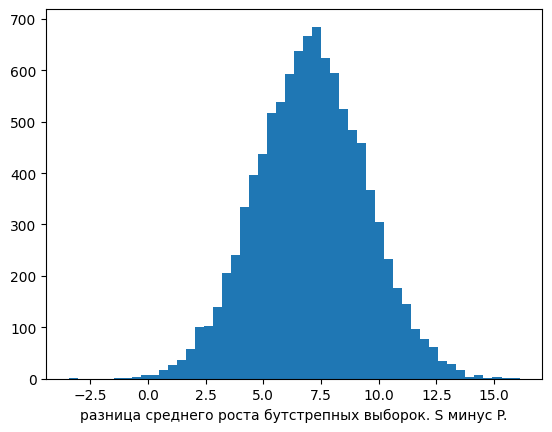

In [48]:
diffs = np.zeros(10000)

for i in range(10000):
    
    s_bootstrapped = np.random.choice(s, size=50)
    p_bootstrapped = np.random.choice(p, size=50)

    diff = s_bootstrapped.mean() - p_bootstrapped.mean()
    
    diffs[i] = diff

plt.hist(diffs, bins=50)
plt.xlabel('разница среднего роста бутстрепных выборок. S минус P.')
plt.show()

In [51]:
left, right = np.quantile(diffs, q=[0.025, 0.975])
left, right

(2.3971684594387144, 11.74613432840024)

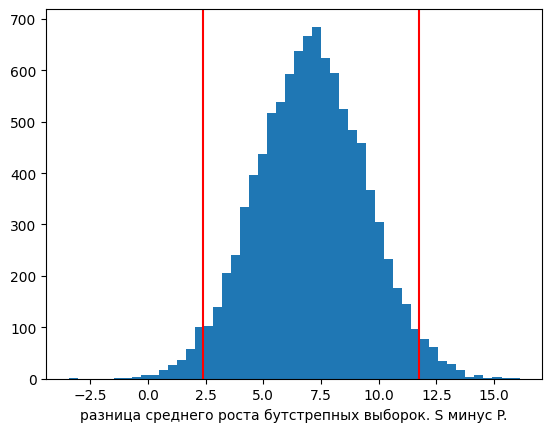

In [55]:
plt.hist(diffs, bins=50)
plt.xlabel('разница среднего роста бутстрепных выборок. S минус P.')
plt.axvline(left, color='red')
plt.axvline(right, color='red')
plt.show()